In [7]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten,Dense
import matplotlib.pyplot as plt
import numpy as np
import random

In [15]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train/255
x_test=x_test/255

In [11]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
#train the model
model.compile(optimizer="SGD",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [17]:
history=model.fit(x_train,y_train,
                  validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6442 - accuracy: 0.8370 - val_loss: 0.3533 - val_accuracy: 0.9055
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3332 - accuracy: 0.9079 - val_loss: 0.2898 - val_accuracy: 0.9209
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2853 - accuracy: 0.9201 - val_loss: 0.2582 - val_accuracy: 0.9282
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2559 - accuracy: 0.9277 - val_loss: 0.2358 - val_accuracy: 0.9359
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2337 - accuracy: 0.9341 - val_loss: 0.2203 - val_accuracy: 0.9376


In [22]:
#evaulate the model
test_loss,test_acc=model.evaluate(x_test,y_test)
print("loss =" , test_loss)
print("Accuracy = " ,test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.2203 - accuracy: 0.9376
loss = 0.22032663226127625
Accuracy =  0.9376000165939331


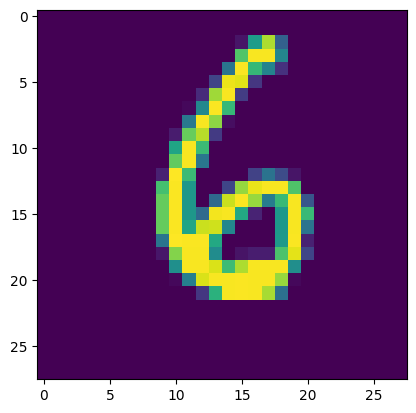

313/313 [==============================] - 0s 1ms/step
The handwritten number in the image is 6


In [24]:
n=random.randint(0,999)
plt.imshow(x_test[n])
plt.show()

prediction=model.predict(x_test)
print("The handwritten number in the image is %d"%np.argmax(prediction[n]))

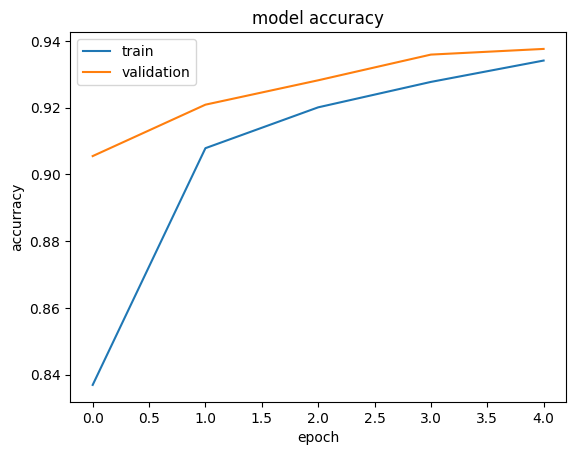

In [26]:
#ploting the model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accurracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],)
plt.show()

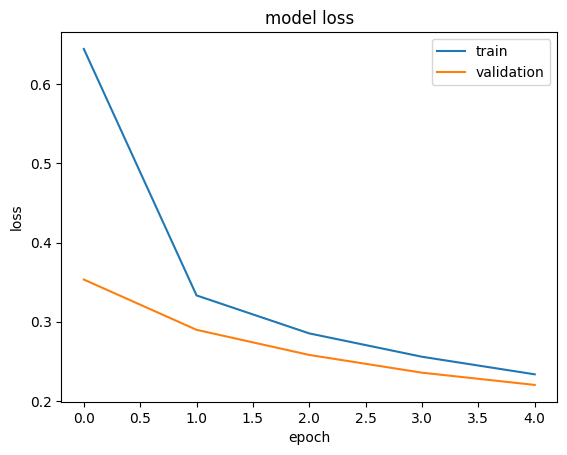

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],)
plt.show()